<a href="https://colab.research.google.com/github/Amann19/4NI22CI005/blob/main/SOM_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=b3ca8816fd25ad8baa983236b924bcedcd87e8c4c2a4d37c649444eab181cf2e
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom
Training SOM...
Training complete.


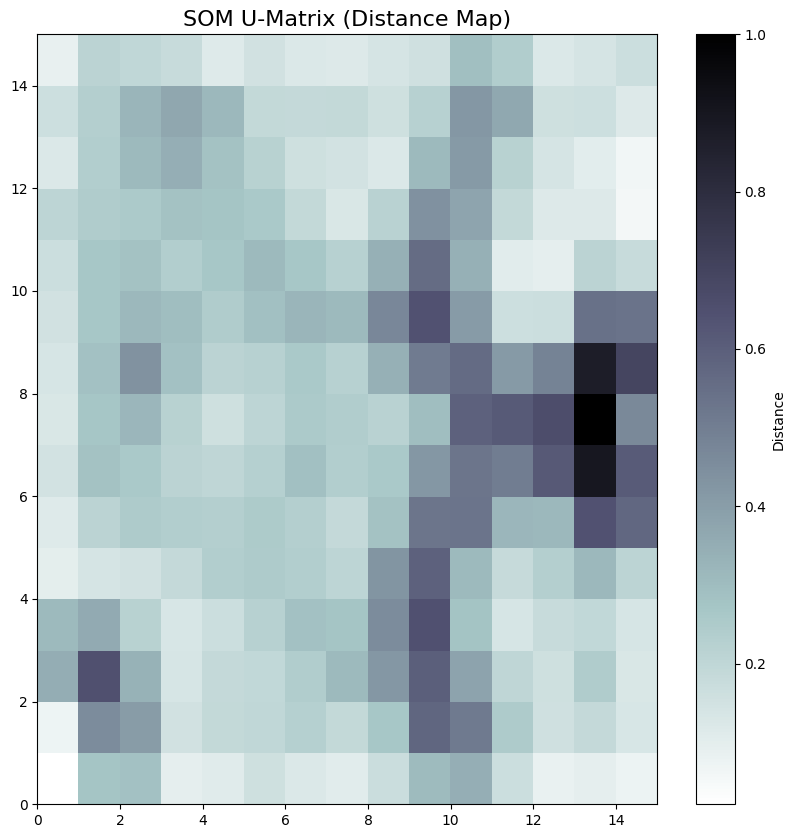

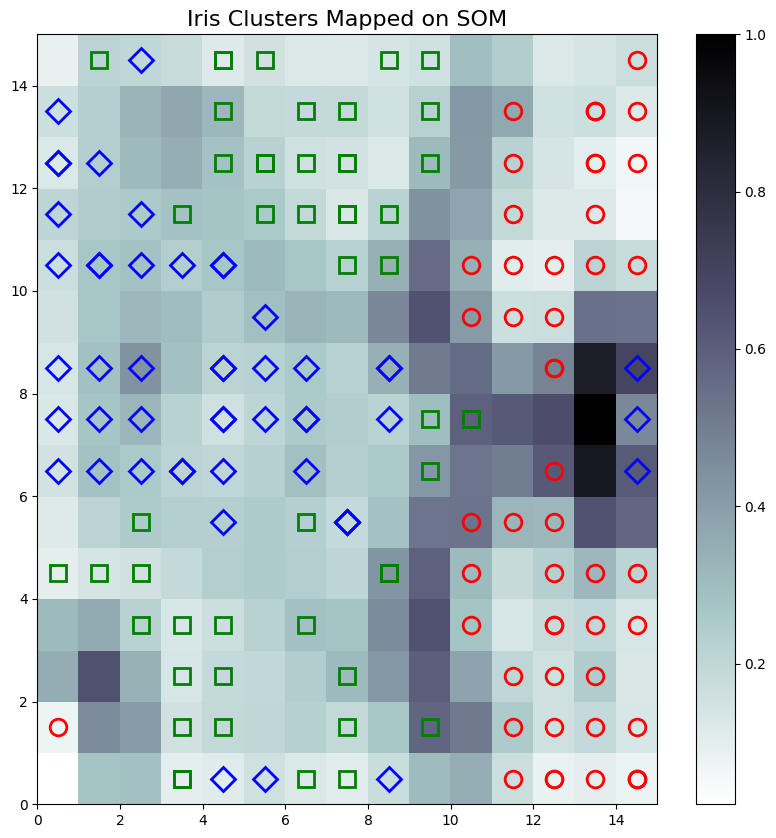


Example SOM cluster assignments (first 10 samples):
[(np.int64(12), np.int64(9)), (np.int64(13), np.int64(13)), (np.int64(12), np.int64(0)), (np.int64(13), np.int64(0)), (np.int64(12), np.int64(2)), (np.int64(14), np.int64(4)), (np.int64(13), np.int64(1)), (np.int64(13), np.int64(10)), (np.int64(14), np.int64(0)), (np.int64(14), np.int64(12))]


In [1]:
#   Self-Organizing Map in Colab

# Install MiniSom (lightweight SOM library)
!pip install minisom

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

# Load Example Dataset (Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Normalize features to [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create and Train SOM
som_x = 15     # SOM grid width
som_y = 15     # SOM grid height
iterations = 5000

som = MiniSom(x=som_x, y=som_y, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)

som.random_weights_init(X_scaled)
print("Training SOM...")
som.train_random(X_scaled, iterations)
print("Training complete.")

# Plot U-Matrix (distance map)
plt.figure(figsize=(10, 10))
plt.title("SOM U-Matrix (Distance Map)", fontsize=16)
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar(label='Distance')
plt.show()

# Visualize Iris Clusters on the SOM
plt.figure(figsize=(10, 10))
plt.title("Iris Clusters Mapped on SOM", fontsize=16)
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

# Markers for each Iris class
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']

for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markerfacecolor='None',
        markeredgecolor=colors[y[i]],
        markersize=12,
        markeredgewidth=2
    )

plt.show()

# Get Cluster Assignments from SOM
cluster_assignments = []
for x in X_scaled:
    cluster_assignments.append(som.winner(x))

print("\nExample SOM cluster assignments (first 10 samples):")
print(cluster_assignments[:10])
